# Gradient Descent Algorithm


1) Calculate the derivative of following cost function and write it down:

  $g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w - 50 \right)$
  
  $\frac{\partial}{\partial w}g(w) = \frac{1}{50}\left(4w^3 + 2w + 10 \right)$

2) Implement the gradient descent function as discussed in class using the gradient derived in the last problem. The function should return the cost history for each step. Use the code template below:


In [1]:
#gradient descent function
#inputs: alpha (learning rate parameter), max_its (maximum number of iterations), w0 (initialization)
def gradient_descent(alpha, max_its, w0):
    cost_history = []
    cost_history.append((1/50)*(w0**4+w0**2+10*w0-50))
    for k in range(max_its):
        k = k + 1
        w0 = w0 - alpha*(1/50)*(4*(w0**3)+2*w0+10)
        cost_history.append((1/50)*(w0**4+w0**2+10*w0-50))
    return cost_history

3) Run the gradient_descent function you implemented three times, with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). If you are not familiar with plotting in python, here is the docs for matplotlib:(https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).


$w^0$ = 2.0
max_its = 1000

# first run
alpha = 1
# second run
alpha = 0.1
# third run
alpha = 0.01


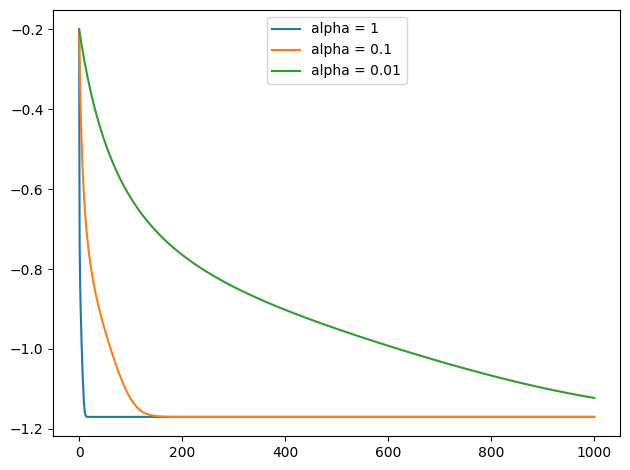

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
w0 = 2.0
max_its = 1000

alpha1 = 1
alpha2 = 0.1
alpha3 = 0.01

y1 = gradient_descent(alpha1, max_its, w0)
y2 = gradient_descent(alpha2, max_its, w0)
y3 = gradient_descent(alpha3, max_its, w0)

x = np.linspace(0, max_its, max_its + 1)

plt.rcParams["figure.autolayout"] = True
line1, = plt.plot(x, y1, label = "alpha = 1")
line2, = plt.plot(x, y2, label = "alpha = 0.1")
line3, = plt.plot(x, y3, label = "alpha = 0.01")
leg = plt.legend(loc='upper center')

plt.show()

For the next few problems we will be comparing fixed and diminishing learning rates

Take the following cost function:
\begin{equation}
g(w) = \left \vert w \right \vert
\end{equation}

4) Is this function convex? If no, why not? If yes, where is its global minimum?


Yes! The absolute value function is a convex function because it is a real-valued function where the line segment between any two points on the graph of the function does not lie below the graph between the two points. Its global minimum is at the point (0,0) because all y values of the other points are > 0.

5) What is the derivative of the cost function?

the derivative of the cost function is +1 when x > 0, and is -1 when x < 0, but it's not differentiable when x = 0.

6) Rewrite the gradient descent function from question 2 such that it takes the cost funciton g as input and uses the autograd library to calculate the gradient. The function should return the weight and cost history for each step.

In [3]:
from autograd import grad

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function
    cost_history = []
    weight_history = []
    cost_history.append(g(w0))
    weight_history.append(w0)
    for k in range(max_its):
        w0 = w0 - alpha * gradient(w0)
        cost_history.append(g(w0))
        weight_history.append(w0)
    return weight_history, cost_history

7) Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, and a fixed learning rate of $\alpha = 0.5$. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis). Recall that the terms weight and parameter used interchangeably and both refer to w.

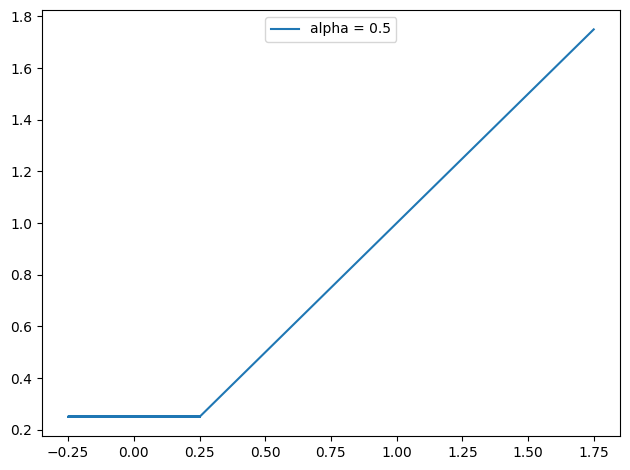

In [5]:
import matplotlib.pyplot as plt
from autograd import grad

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function
    cost_history = []
    weight_history = []
    cost_history.append(g(w0))
    weight_history.append(w0)

    for k in range(max_its):
        w0 = w0 - alpha * gradient(w0)
        cost_history.append(g(w0))
        weight_history.append(w0)

    return weight_history, cost_history

def g (x):
    return abs(x)

alpha1 = 0.5
max_its = 20
w0 = 1.75
weight_history1, cost_history1 = gradient_descent(g, alpha1, max_its, w0)

#plotting of question 7
plt.rcParams["figure.autolayout"] = True
line1, = plt.plot(weight_history1, cost_history1, label = "alpha = 0.5", alpha=1)
leg = plt.legend(loc='upper center')
plt.show()

8) Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, using the diminishing rule $\alpha = \frac{1}{k}$.
 Using the cost and wiehgt history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis)

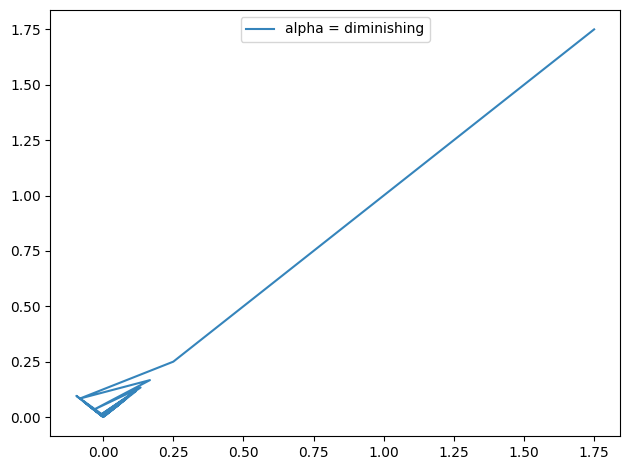

In [6]:
import matplotlib.pyplot as plt
from autograd import grad

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function
    cost_history = []
    weight_history = []
    cost_history.append(g(w0))
    weight_history.append(w0)

    if alpha=='diminishing':
        for k in range(1, max_its + 1):
            alpha = 1/k
            w0 = w0 - alpha * gradient(w0)
            cost_history.append(g(w0))
            weight_history.append(w0)
        pass

    else:
        for k in range(max_its):
            w0 = w0 - alpha * gradient(w0)
            cost_history.append(g(w0))
            weight_history.append(w0)
        pass

    return weight_history, cost_history

def g (x):
    return abs(x)

alpha2 = 'diminishing'
max_its = 20
w0 = 1.75
weight_history2, cost_history2 = gradient_descent(g, alpha2, max_its, w0)

#plotting of question 8
plt.rcParams["figure.autolayout"] = True
line2, = plt.plot(weight_history2, cost_history2, label = "alpha = diminishing", alpha=0.9)
leg = plt.legend(loc='upper center')
plt.show()

9) Generate a single plot showing the cost as a function of step number for both runs (combine all  runs into a single plot). Which approach works better? Why ?

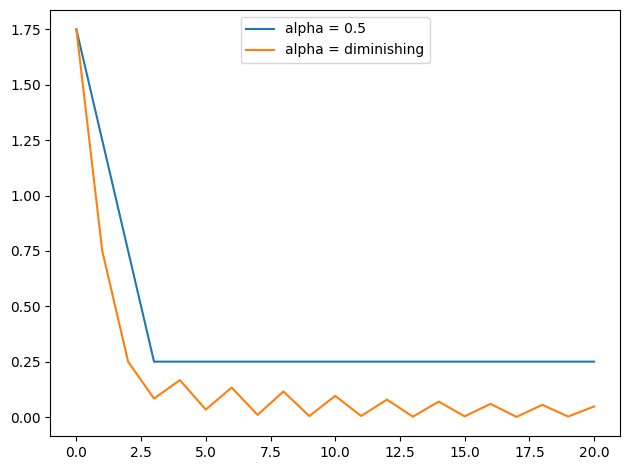

In [7]:
import matplotlib.pyplot as plt
from autograd import grad
import numpy as np

x = np.linspace(0, 20, 21)

plt.rcParams["figure.autolayout"] = True
line1, = plt.plot(x, cost_history1, label = "alpha = 0.5")
line2, = plt.plot(x, cost_history2, label = "alpha = diminishing")
leg = plt.legend(loc='upper center')

plt.show()

the approach using the diminishing learning rate works better because if we take a look at the previous graph plotting the cost as a function of step number, we can see that when alpha is fixed the cost function keeps decreasing but eventually gets stuck around cost value = 0.25 and never gets closer to 0 again, however, when alpha is diminishing, the cost function keeps decreasing until it reaches a value that is relatively closer to 0 than the one the fixed learning rate function reaches.

We will now look at the oscilating behavior of gradient descent.

Take the following cost function:
$g(w) = w_0^2 + w_1^2 + 2\sin(1.5 (w_0 + w_1)) +2$

Note that this cost function has two parameters.

10) Make sure your gradient descent function from problem 6 can handle cost functions with more than one parameter. You may need to rewrite it if you were not careful. Use the code template below (if your function from problem 6 is good, you can just copy and paste it here)

In [8]:
from ctypes import sizeof
from autograd import grad

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function
    cost_history = []
    weight_history = []
    cost_history.append(g(w0))
    weight_history.append(w0)
    for k in range(max_its):
        for k in range(len(w0)):
          w0[k] = w0[k] - alpha * gradient(w0)[k]
        cost_history.append(g(w0))
        weight_history.append(w0)

    return weight_history, cost_history

In [11]:
from ctypes import sizeof
from autograd import grad

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g, alpha, max_its, w0):
    gradient = grad(g)
    weights = np.array(w0)
    weight_history = np.array([weights])
    cost_history = [g(w0)]

    for i in range(max_its):
      step = gradient(weights)

      for k in range (len(weights)):
        weights[k] -= (alpha * step[k])

      weight_history = np.insert(np.array(weight_history), i+1, np.array(weights), axis=0)
      cost = g(weights)
      cost_history.append(cost)
    return weight_history, cost_history

11) Run the gradient_descent function with the cost function above three times with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). Use the code template below. Which alpha leads to an oscillating behavior?

$w^0$ = [3.0,3.0]
max_its = 10

# first run
alpha = 0.01
# second run
alpha = 0.1
# third run
alpha = 1



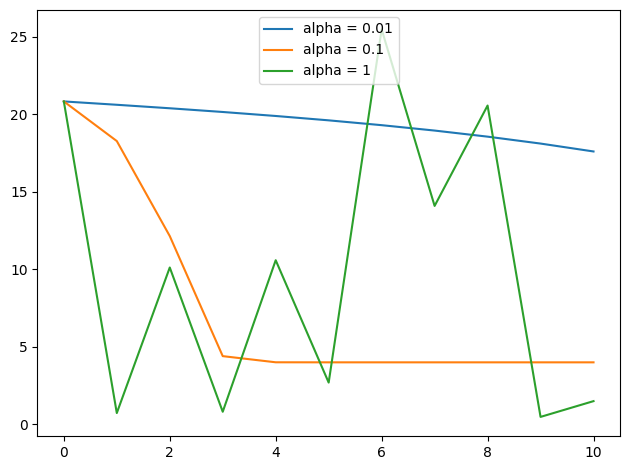

In [12]:
import autograd.numpy as np

def g (w):
  w0 = w[0]
  w1 = w[1]
  return w0**2 + w1**2 + 2*np.sin(1.5*(w0+w1)) + 2

w0 = [3.0,3.0]
max_its = 10
alpha1 = 0.01
alpha2 = 0.1
alpha3 = 1

weight_history1 = []
cost_history1 = []
weight_history1, cost_history1 = gradient_descent(g, alpha1, max_its, w0)

weight_history2 = []
cost_history2 = []
weight_history2, cost_history2 = gradient_descent(g, alpha2, max_its, w0)

weight_history3 = []
cost_history3 = []
weight_history3, cost_history3 = gradient_descent(g, alpha3, max_its, w0)

x = np.linspace(0, max_its, max_its + 1)

plt.rcParams["figure.autolayout"] = True
line1, = plt.plot(x, cost_history1, label = "alpha = 0.01")
line2, = plt.plot(x, cost_history2, label = "alpha = 0.1")
line3, = plt.plot(x, cost_history3, label = "alpha = 1")
leg = plt.legend(loc='upper center')

plt.show()

if we look at the above graph, we notice that alpha = 1 leads to an oscillating behavior

12) This problem is about learning to tune fixed step length for gradient descent. Here, you are given a cost function:
$g(w) = 2w_0^2 + w_1^2 +4w_2^2$

Assume your $w^0$= [5,5,5] and your max_iter = 100

Use your latest gradient descent function with a fixed learning rate. Play around with at least 5 different values of alpha (using your intuition). Generate a single plot of the cost as a function of the number of iterations. Which value of alpha seems to converge the fastest?

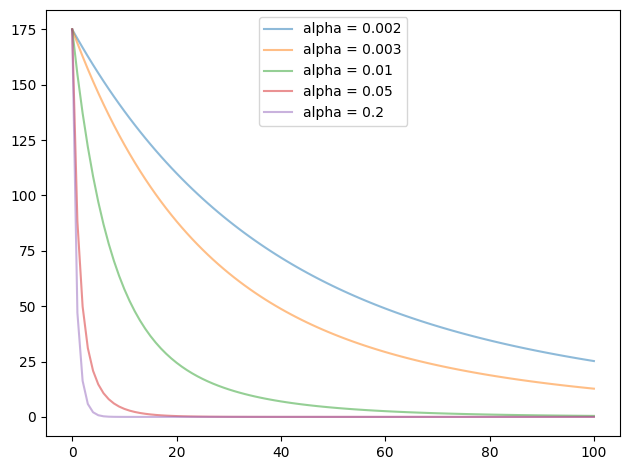

In [19]:
def g (w):
  w0 = w[0]
  w1 = w[1]
  w2 = w[2]
  return (2*(w0**2) + (w1**2) + 4*(w2**2))

w0 = [5.0,5.0,5.0]
max_its = 100

alpha1 = 0.002
alpha2 = 0.003
alpha3 = 0.01
alpha4 = 0.05
alpha5 = 0.2

cost_history1 = []
weight_history1 = []

cost_history2 = []
weight_history2 = []

cost_history3 = []
weight_history3 = []

cost_history4 = []
weight_history4 = []

cost_history5 = []
weight_history5 = []

weight_history1, cost_history1 = gradient_descent(g, alpha1, max_its, w0)
weight_history2, cost_history2 = gradient_descent(g, alpha2, max_its, w0)
weight_history3, cost_history3 = gradient_descent(g, alpha3, max_its, w0)
weight_history4, cost_history4 = gradient_descent(g, alpha4, max_its, w0)
weight_history5, cost_history5 = gradient_descent(g, alpha5, max_its, w0)


x = np.linspace(0, max_its, max_its + 1)

plt.rcParams["figure.autolayout"] = True
line1, = plt.plot(x, cost_history1, label = "alpha = 0.002", alpha=0.5)
line2, = plt.plot(x, cost_history2, label = "alpha = 0.003", alpha=0.5)
line3, = plt.plot(x, cost_history3, label = "alpha = 0.01", alpha=0.5)
line4, = plt.plot(x, cost_history4, label = "alpha = 0.05", alpha=0.5)
line5, = plt.plot(x, cost_history5, label = "alpha = 0.2", alpha=0.5)
leg = plt.legend(loc='upper center')

plt.show()

based on the graph, it seems like when alpha = 0.2, it converges the fastest compared to all the other values of alpha, it only takes the gradient descent few steps to converge to a cost value close to 0.